In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm   
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


In [8]:
data=pd.read_excel('./Obesity.xlsx')


In [9]:
df=data.drop(['Gender(M/F))', 'family_history_with_overweight','Frequent consumption of high caloric food',
         'Consumption of food between meals','SMOKE(no)','Calories consumption','Consumption of alcohol',
        'Transportation used','NObeyesdad'], axis=1)
df

,Gender,Age,Height,Weight,History,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Nobesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,2
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,6
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,6
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,6
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,6


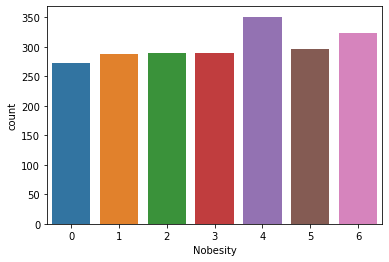

In [10]:
sns.countplot(x='Nobesity',data=df)

(20, 0)

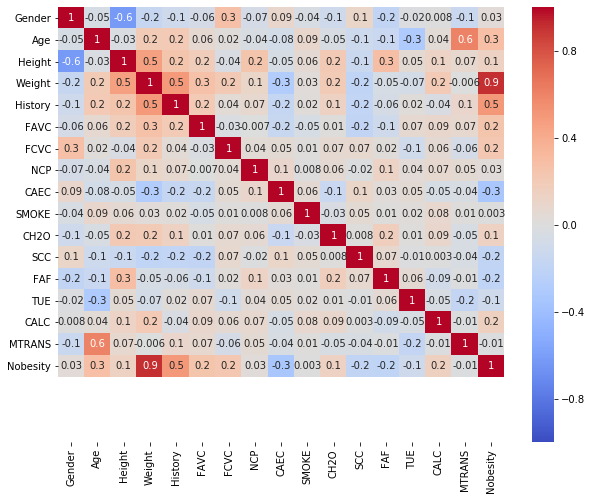

In [11]:
plt.figure(figsize=(10, 8))
ax=sns.heatmap(df.corr(), annot = True,vmin=-1, vmax=1,fmt='.1g',center= 0,cmap= 'coolwarm')
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(20, 0)

In [12]:
x=df.drop('Nobesity',axis=1)
x

,Gender,Age,Height,Weight,History,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1


In [13]:
y=df['Nobesity'].values
y

array([1, 1, 1, ..., 6, 6, 6])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [44]:
model=svm.SVC(C=20,
              kernel='linear',
              decision_function_shape='ovr')


In [45]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [46]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' %(tip, np.mean(acc)))
def print_accuracy(model,x_train,y_train,x_test,y_test):
    print('trianing prediction:%.3f' %(model.score(x_train, y_train)))
    print('test data prediction:%.3f' %(model.score(x_test, y_test)))
    
    show_accuracy(model.predict(x_train), y_train, 'traing data')
    show_accuracy(model.predict(x_test), y_test, 'testing data')
    
    print('decision_function:\n', model.decision_function(x_train))

In [47]:
print_accuracy(model,x_train,y_train,x_test,y_test)

trianing prediction:0.972
test data prediction:0.935
traing data Accuracy:0.972
testing data Accuracy:0.935
decision_function:
 [[ 0.67607887  3.29162381  4.31356278 ...  6.31413814  1.68680694
  -0.31323021]
 [ 6.31171542  5.3238914   4.3213807  ...  1.71150007  0.67300235
  -0.32336368]
 [-0.32565057  1.24522788  3.30245364 ...  6.31566225  3.82152308
   1.70535181]
 ...
 [ 0.67913452  3.30063181  4.31219134 ...  5.30594852  1.68333764
  -0.30841294]
 [ 2.68886236  5.31468828  5.31749003 ...  2.28167596  0.67747505
  -0.31951857]
 [ 0.67824136  3.30309038  5.31486777 ...  4.30274726  1.68658364
  -0.31023671]]


(9, 0)

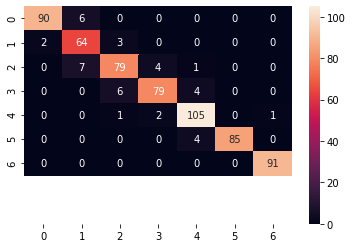

In [48]:
qdacon=confusion_matrix(y_pred, y_test)
ax=sns.heatmap(qdacon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(9,0)

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
accuracy = cross_val_score(model, x, y, scoring='accuracy', cv = 10)
print(accuracy)

[0.81308411 0.89671362 0.95754717 0.96226415 0.96682464 0.97630332
 0.97156398 0.96650718 0.98086124 0.99043062]


In [16]:
accuracy = cross_val_score(model, x, y, scoring='accuracy', cv = 10)
print("mean CV accuracy rate:%.2f"%accuracy.mean())

mean CV accuracy rate:0.95


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,oob_score=True,max_features=15)

In [36]:
rf.fit(x_train,y_train)
y_rf_pred=rf.predict(x_test)


In [37]:
print(classification_report(y_test, y_rf_pred, digits=3))

              precision    recall  f1-score   support

           0      0.967     0.967     0.967        92
           1      0.886     0.909     0.897        77
           2      0.918     0.876     0.897        89
           3      0.940     0.918     0.929        85
           4      0.942     0.991     0.966       114
           5      0.988     0.965     0.976        85
           6      1.000     1.000     1.000        92

    accuracy                          0.950       634
   macro avg      0.949     0.947     0.947       634
weighted avg      0.950     0.950     0.949       634



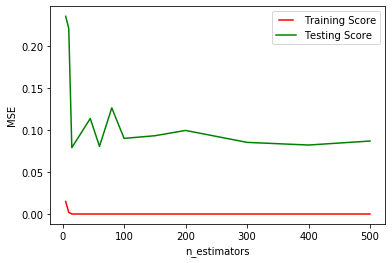

In [20]:
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100,150,200,300,400,500]

for nb_trees in list_nb_trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(x_train, y_train)

    train_results.append(mean_squared_error(y_train, rf.predict(x_train)))
    test_results.append(mean_squared_error(y_test, rf.predict(x_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

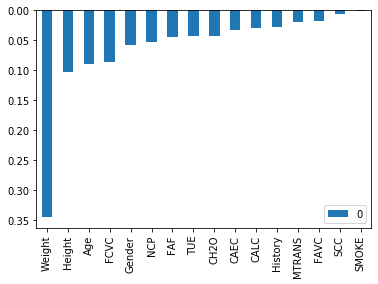

In [45]:
importances = list(zip(rf.feature_importances_, df.columns))
importances.sort(reverse=True)
ax=pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')



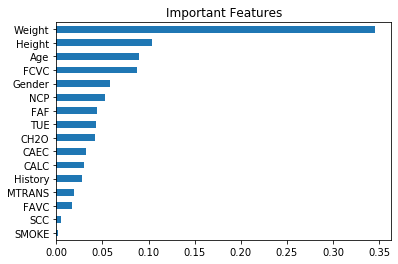

In [46]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(18).plot(kind='barh').invert_yaxis()
plt.title("Important Features")
plt.show()

In [27]:
from sklearn import tree

[Text(359.96121153539536, 792.75, 'X[4] <= 0.5\ngini = 0.855\nsamples = 936\nvalue = [183, 239, 185, 216, 225, 190, 239]'),
 Text(71.72951211734693, 747.45, 'X[3] <= 50.945\ngini = 0.685\nsamples = 174\nvalue = [112, 102, 56, 16, 3, 0, 0]'),
 Text(25.622448979591837, 702.15, 'X[13] <= 0.031\ngini = 0.26\nsamples = 68\nvalue = [99, 18, 0, 0, 0, 0, 0]'),
 Text(17.081632653061224, 656.85, 'X[7] <= 2.947\ngini = 0.494\nsamples = 20\nvalue = [20, 16, 0, 0, 0, 0, 0]'),
 Text(12.811224489795919, 611.55, 'gini = 0.0\nsamples = 7\nvalue = [10, 0, 0, 0, 0, 0, 0]'),
 Text(21.35204081632653, 611.55, 'X[2] <= 1.601\ngini = 0.473\nsamples = 13\nvalue = [10, 16, 0, 0, 0, 0, 0]'),
 Text(17.081632653061224, 566.25, 'X[14] <= 1.5\ngini = 0.266\nsamples = 9\nvalue = [3, 16, 0, 0, 0, 0, 0]'),
 Text(12.811224489795919, 520.95, 'X[1] <= 19.752\ngini = 0.198\nsamples = 8\nvalue = [2, 16, 0, 0, 0, 0, 0]'),
 Text(8.540816326530612, 475.65, 'X[12] <= 0.731\ngini = 0.375\nsamples = 4\nvalue = [2, 6, 0, 0, 0, 0, 

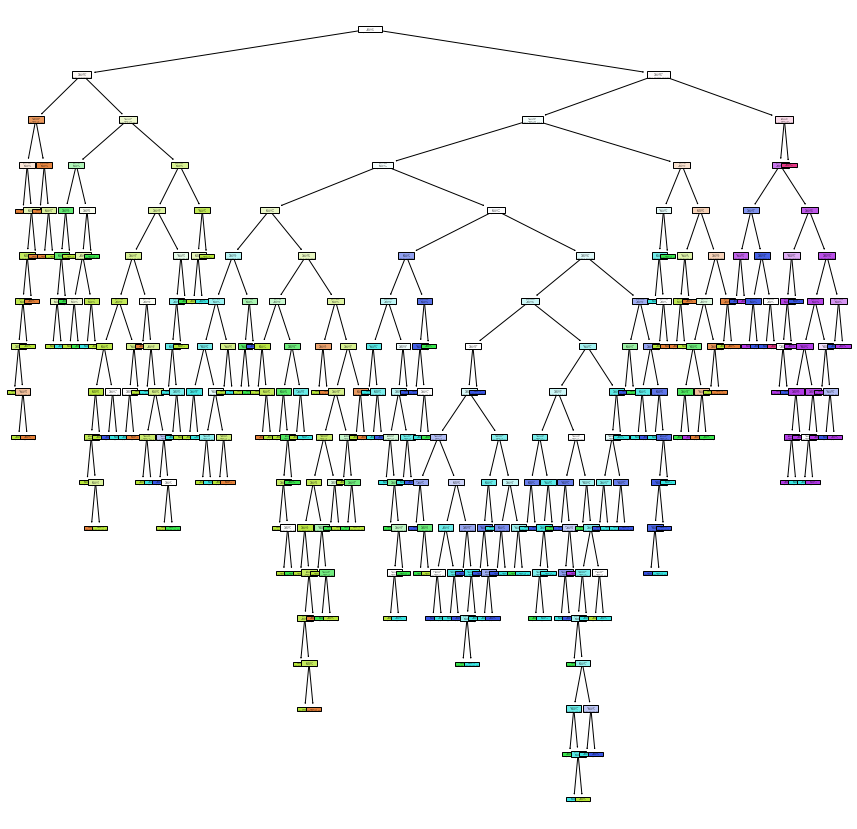

In [61]:
plt.figure(figsize=(15,15))
tree.plot_tree(rf.estimators_[1],filled=True)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
x_train_nor=StandardScaler().fit_transform(x_train)
x_test_nor=StandardScaler().fit_transform(x_test)

In [57]:
from sklearn.cluster import KMeans

In [148]:
km = KMeans(n_clusters=7,init='k-means++', max_iter=300, n_init=3, random_state=0).fit(x_train_nor)

In [149]:
y_km=km.predict(x_test_nor)

              precision    recall  f1-score   support

           0      0.042     0.054     0.048        92
           1      0.140     0.234     0.175        77
           2      0.039     0.045     0.042        89
           3      0.393     0.259     0.312        85
           4      0.008     0.009     0.008       114
           5      0.351     0.388     0.369        85
           6      0.083     0.011     0.019        92

    accuracy                          0.132       634
   macro avg      0.151     0.143     0.139       634
weighted avg      0.142     0.132     0.130       634



(9, 0)

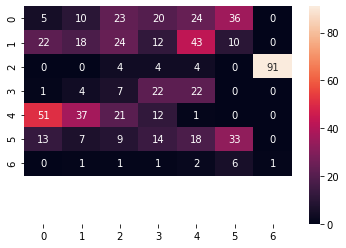

In [151]:
print(classification_report(y_test, y_km, digits=3))
nncon=confusion_matrix(y_km, y_test)
ax=sns.heatmap(nncon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(9,0)

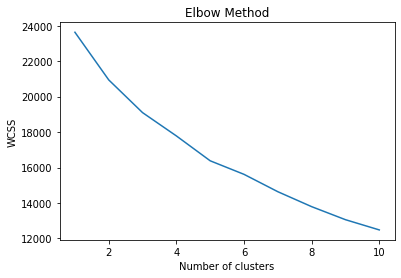

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_train_nor)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
from sklearn.neural_network import MLPClassifier

In [136]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4,5), random_state=1)

In [137]:
clf.fit(x_train_nor,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [138]:
y_n_pred=clf.predict(x_test_nor)

In [139]:
print(classification_report(y_test, y_n_pred, digits=3))

              precision    recall  f1-score   support

           0      0.978     0.978     0.978        92
           1      0.971     0.857     0.910        77
           2      0.889     0.899     0.894        89
           3      0.898     0.929     0.913        85
           4      0.957     0.974     0.965       114
           5      0.955     1.000     0.977        85
           6      1.000     0.989     0.995        92

    accuracy                          0.950       634
   macro avg      0.950     0.947     0.948       634
weighted avg      0.950     0.950     0.949       634



(9, 0)

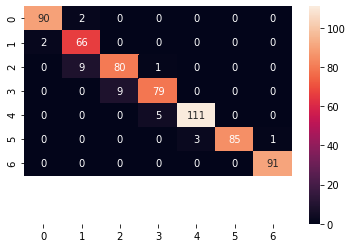

In [140]:
nncon=confusion_matrix(y_n_pred, y_test)
ax=sns.heatmap(nncon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(9,0)

In [68]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=17)
clf = clf.fit(x_train, y_train)

In [69]:
y_tree_pred=clf.predict(x_test)

In [70]:
print(classification_report(y_test, y_tree_pred, digits=3))

              precision    recall  f1-score   support

           0      0.918     0.967     0.942        92
           1      0.815     0.571     0.672        77
           2      0.664     0.820     0.734        89
           3      0.818     0.741     0.778        85
           4      0.879     0.956     0.916       114
           5      0.988     0.929     0.958        85
           6      1.000     1.000     1.000        92

    accuracy                          0.866       634
   macro avg      0.869     0.855     0.857       634
weighted avg      0.871     0.866     0.864       634



(9, 0)

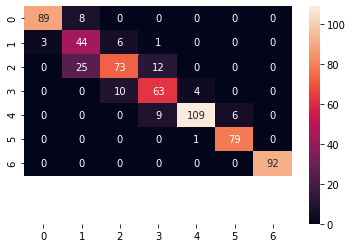

In [34]:
nncon=confusion_matrix(y_tree_pred, y_test)
ax=sns.heatmap(nncon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(9,0)

In [49]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.938     0.978     0.957        92
           1      0.928     0.831     0.877        77
           2      0.868     0.888     0.878        89
           3      0.888     0.929     0.908        85
           4      0.963     0.921     0.942       114
           5      0.955     1.000     0.977        85
           6      1.000     0.989     0.995        92

    accuracy                          0.935       634
   macro avg      0.934     0.934     0.933       634
weighted avg      0.936     0.935     0.935       634

